In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"E:\Projects\Foodsense\data\foodsense_meals_symptoms.csv")


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   meal_id           220 non-null    int64 
 1   date              220 non-null    object
 2   meal_time         220 non-null    object
 3   food              220 non-null    object
 4   portion_size      220 non-null    object
 5   had_coffee        220 non-null    object
 6   sleep_quality     220 non-null    object
 7   stress_level      220 non-null    object
 8   location          220 non-null    object
 9   symptom           105 non-null    object
 10  symptom_severity  220 non-null    int64 
 11  hours_after_meal  220 non-null    int64 
dtypes: int64(3), object(9)
memory usage: 20.8+ KB


In [3]:
df['date'] = pd.to_datetime(df['date'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   meal_id           220 non-null    int64         
 1   date              220 non-null    datetime64[ns]
 2   meal_time         220 non-null    object        
 3   food              220 non-null    object        
 4   portion_size      220 non-null    object        
 5   had_coffee        220 non-null    object        
 6   sleep_quality     220 non-null    object        
 7   stress_level      220 non-null    object        
 8   location          220 non-null    object        
 9   symptom           105 non-null    object        
 10  symptom_severity  220 non-null    int64         
 11  hours_after_meal  220 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 20.8+ KB


In [4]:
df.head(10)

,meal_id,date,meal_time,food,portion_size,had_coffee,sleep_quality,stress_level,location,symptom,symptom_severity,hours_after_meal
0,1,2024-10-01,Morning,milk,Large,Yes,Okay,Low,Office,Acidity,10,3
1,2,2024-10-01,Afternoon,paratha,Medium,Yes,Okay,Low,Street,NaN,0,0
2,3,2024-10-01,Evening,chicken curry,Large,No,Okay,Low,Street,Fatigue,9,4
3,4,2024-10-02,Morning,fish,Large,No,Poor,High,Restaurant,Bloating,3,3
4,5,2024-10-02,Afternoon,paneer curry,Medium,No,Poor,High,Home,NaN,0,0
5,6,2024-10-03,Morning,whole wheat bread,Small,No,Okay,Medium,Home,Brain fog,8,3
6,7,2024-10-03,Afternoon,bread,Medium,Yes,Okay,Medium,Street,NaN,0,0
7,8,2024-10-04,Morning,poha,Large,Yes,Okay,Medium,Home,Fatigue,5,4
8,9,2024-10-04,Afternoon,milk,Large,No,Okay,Medium,Street,Acidity,3,3
9,10,2024-10-05,Morning,biryani,Medium,Yes,Good,Low,Office,Fatigue,4,4


In [5]:
# 1. Replace missing symptom values with 'No' (assuming missing means no symptom)
df['symptom'] = df['symptom'].fillna('No')

# 2. Create a new column: 1 if symptom occurred, 0 if not
df['symptom_flag'] = df['symptom'].apply(lambda x: 0 if x.lower() == 'no' else 1)

# 3. Group by food and calculate metrics
food_risk = df.groupby('food').agg(
    total_meals=('meal_id', 'count'),
    meals_with_symptom=('symptom_flag', 'sum')
).reset_index()

# 4. Calculate symptom rate % (Food Risk Score)
food_risk['symptom_rate_pct'] = (food_risk['meals_with_symptom'] / food_risk['total_meals']) * 100

# 5. Sort by highest risk
food_risk = food_risk.sort_values(by='symptom_rate_pct', ascending=False)

food_risk


,food,total_meals,meals_with_symptom,symptom_rate_pct
13,milk,6,5,83.333333
23,rice,6,5,83.333333
6,chole,9,7,77.777778
3,bread,8,6,75.000000
24,roti,4,3,75.000000
7,curd,7,5,71.428571
15,omelette,9,6,66.666667
4,butter chicken,6,4,66.666667
17,paneer curry,8,5,62.500000
11,fish,13,8,61.538462


In [8]:
def assign_category(food):
    food = food.lower()
    if 'rice' in food:
        return 'carbs'
    if 'bread' in food or 'roti' in food:
        return 'gluten'
    if 'milk' in food or 'curd' in food or 'cheese' in food:
        return 'dairy'
    if 'egg' in food or 'chicken' in food:
        return 'protein'
    if 'coffee' in food or 'tea' in food:
        return 'caffeine'
    return 'other'

df['food_categories'] = df['food'].apply(assign_category)


In [10]:
df['symptom'] = df['symptom'].fillna('no')

df['symptom_flag'] = df['symptom'].apply(
    lambda x: 0 if str(x).lower() == 'no' else 1
)

category_risk = (
    df.groupby('food_categories')
      .agg(
          total_meals=('meal_id', 'count'),
          meals_with_symptom=('symptom_flag', 'sum')
      )
      .reset_index()
)

category_risk['symptom_rate_pct'] = (
    category_risk['meals_with_symptom'] / category_risk['total_meals']
) * 100

category_risk.sort_values('symptom_rate_pct', ascending=False)


,food_categories,total_meals,meals_with_symptom,symptom_rate_pct
0,carbs,6,5,83.333333
1,dairy,13,10,76.923077
2,gluten,21,14,66.666667
3,other,145,64,44.137931
4,protein,35,12,34.285714


While individual meal responses varied, aggregating data at the category level revealed clear non-random patterns: carbohydrate-, dairy-, and gluten-based meals showed consistently higher symptom rates, whereas protein-heavy meals were comparatively well tolerated.

In [ ]:
# Is this the food itself or the quantity ?

# treat missing symptoms as no symptom
df['symptom'] = df['symptom'].fillna('no')

# binary flag: 1 = symptom occurred, 0 = no symptom
df['symptom_flag'] = df['symptom'].apply(
    lambda x: 0 if str(x).lower() == 'no' else 1
)

# group by portion size and compute metrics
portion_risk = (
    df.groupby('portion_size')
      .agg(
          total_meals=('meal_id', 'count'),
          meals_with_symptom=('symptom_flag', 'sum')
      )
      .reset_index()
)

# calculate symptom rate %
portion_risk['symptom_rate_pct'] = (
    portion_risk['meals_with_symptom'] / portion_risk['total_meals']
) * 100

# sort from highest to lowest risk
portion_risk = portion_risk.sort_values(
    by='symptom_rate_pct',
    ascending=False
)

portion_risk


,portion_size,total_meals,meals_with_symptom,symptom_rate_pct
0,Large,72,40,55.555556
1,Medium,81,38,46.913580
2,Small,67,27,40.298507


Portion size shows a measurable impact on symptom occurrence, with larger portions increasing risk; however, portion control alone does not eliminate symptoms for trigger foods, indicating a clear interaction between food type and quantity.


In [ ]:
# Sleep Quality vs Symptoms

# treat missing symptoms as no symptom
df['symptom'] = df['symptom'].fillna('no')

# binary symptom flag
df['symptom_flag'] = df['symptom'].apply(
    lambda x: 0 if str(x).lower() == 'no' else 1
)

# normalize sleep labels
df['sleep_quality_clean'] = df['sleep_quality'].str.lower().str.strip()

# group by sleep quality
sleep_risk = (
    df.groupby('sleep_quality_clean')
      .agg(
          total_meals=('meal_id', 'count'),
          meals_with_symptom=('symptom_flag', 'sum')
      )
      .reset_index()
)

# symptom rate %
sleep_risk['symptom_rate_pct'] = (
    sleep_risk['meals_with_symptom'] / sleep_risk['total_meals']
) * 100

sleep_risk.sort_values('symptom_rate_pct', ascending=False)


,sleep_quality_clean,total_meals,meals_with_symptom,symptom_rate_pct
2,poor,74,39,52.702703
1,okay,61,29,47.540984
0,good,85,37,43.529412


Sleep quality shows a graded relationship with symptom occurrence, with poor sleep associated with the highest symptom rates and progressively better tolerance observed as sleep quality improves.**


In [ ]:
# Stress Level vs Symptoms

# normalize stress labels
df['stress_level_clean'] = df['stress_level'].str.lower().str.strip()

# group by stress level
stress_risk = (
    df.groupby('stress_level_clean')
      .agg(
          total_meals=('meal_id', 'count'),
          meals_with_symptom=('symptom_flag', 'sum')
      )
      .reset_index()
)

# symptom rate %
stress_risk['symptom_rate_pct'] = (
    stress_risk['meals_with_symptom'] / stress_risk['total_meals']
) * 100

stress_risk.sort_values('symptom_rate_pct', ascending=False)


,stress_level_clean,total_meals,meals_with_symptom,symptom_rate_pct
0,high,87,48,55.172414
2,medium,65,30,46.153846
1,low,68,27,39.705882


Stress level demonstrates a clear dose–response relationship with symptoms, with high stress showing the greatest risk and progressively lower symptom rates observed as stress levels decrease.

In [ ]:
# What symptoms show up most?

# drop rows where symptom is missing or explicitly 'no'
symptom_counts = (
    df[df['symptom'].notna() & (df['symptom'].str.lower() != 'no')]
      .assign(symptom_clean=lambda x: x['symptom'].str.lower().str.strip())
      .groupby('symptom_clean')
      .size()
      .reset_index(name='count')
      .sort_values('count', ascending=False)
)

symptom_counts


,symptom_clean,count
1,bloating,25
4,fatigue,20
6,nausea,16
5,gas,13
0,acidity,12
2,bowel movement,12
3,brain fog,7


Symptom analysis showed bloating and fatigue as the most frequently reported outcomes, indicating a predominantly gut-mediated response pattern, with the presence of cognitive symptoms such as brain fog supporting the need for personalized, context-aware dietary interpretation.

In [ ]:
# Define risk thresholds
def risk_level(rate):
    if rate < 25:
        return 'LOW'
    elif rate < 45:
        return 'MEDIUM'
    else:
        return 'HIGH'

# Apply to your food_risk dataframe
food_risk['risk_level'] = food_risk['symptom_rate_pct'].apply(risk_level)

# Optional: sort by highest risk for viewing
food_risk = food_risk.sort_values(by='symptom_rate_pct', ascending=False)

food_risk


,food,total_meals,meals_with_symptom,symptom_rate_pct,risk_level
13,milk,6,5,83.333333,HIGH
23,rice,6,5,83.333333,HIGH
6,chole,9,7,77.777778,HIGH
3,bread,8,6,75.000000,HIGH
24,roti,4,3,75.000000,HIGH
7,curd,7,5,71.428571,HIGH
15,omelette,9,6,66.666667,HIGH
4,butter chicken,6,4,66.666667,HIGH
17,paneer curry,8,5,62.500000,HIGH
11,fish,13,8,61.538462,HIGH


Food-level analysis revealed that a concentrated subset of meals—predominantly dairy- and carb-heavy preparations—consistently fell into the high-risk category, while simpler protein-forward foods showed markedly lower symptom rates, underscoring the importance of food context and preparation style over isolated ingredients

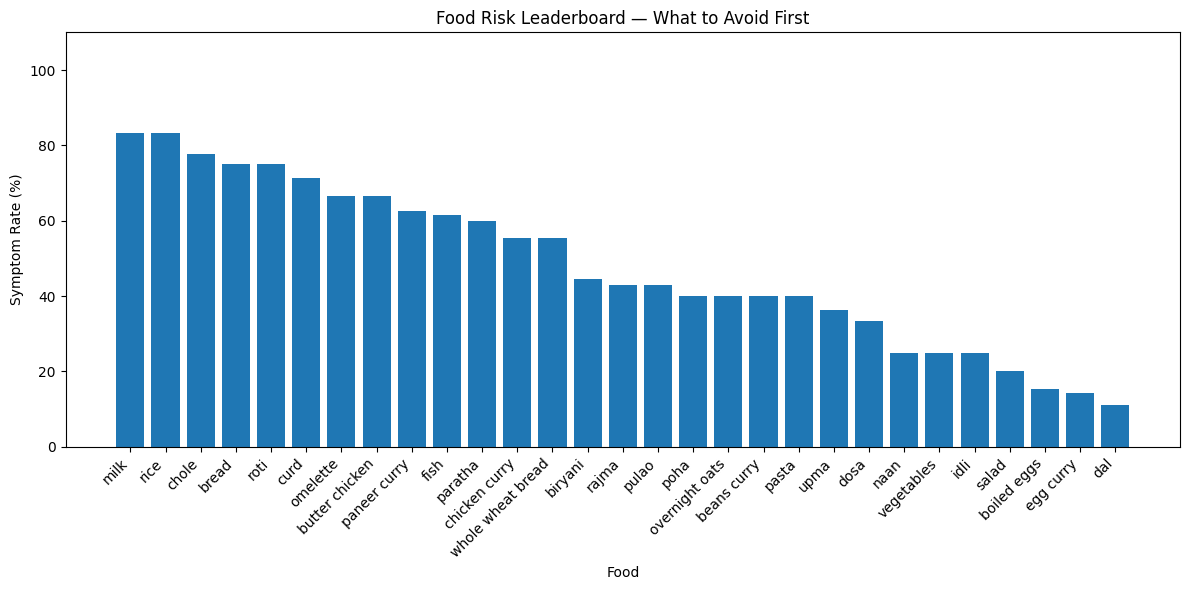

In [ ]:
# sort data
food_risk_sorted = food_risk.sort_values(
    by='symptom_rate_pct',
    ascending=False
)

# plot
plt.figure(figsize=(12, 6))
plt.bar(
    food_risk_sorted['food'],
    food_risk_sorted['symptom_rate_pct']
)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Symptom Rate (%)')
plt.xlabel('Food')
plt.title('Food Risk Leaderboard — What to Avoid First')
plt.ylim(0, 110)

plt.tight_layout()
plt.show()


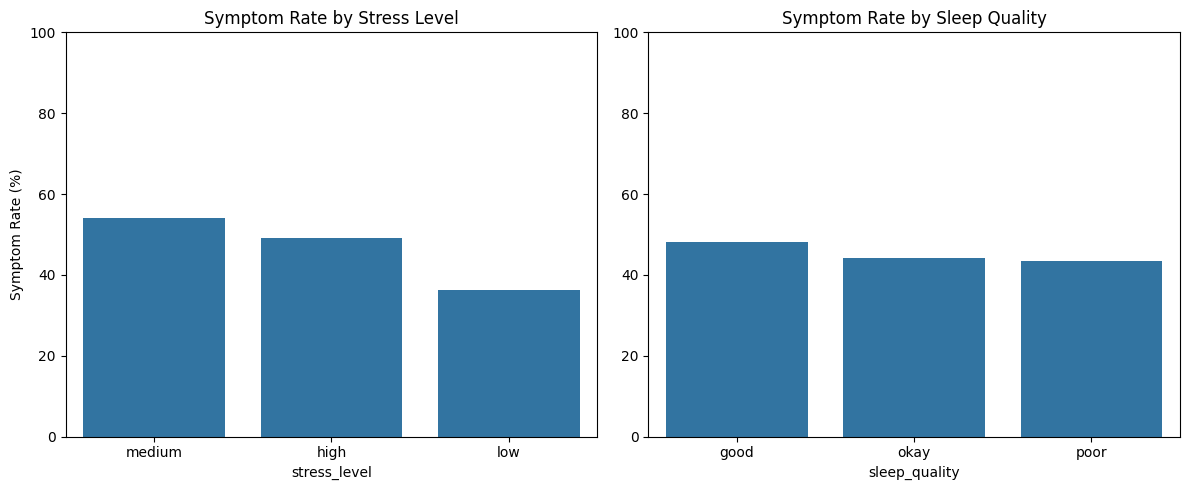

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Stress dataframe
stress_df = pd.DataFrame({
    'stress_level': ['medium', 'high', 'low'],
    'symptom_rate_pct': [54.054054, 49.090909, 36.170213]
})

# Sleep dataframe
sleep_df = pd.DataFrame({
    'sleep_quality': ['good', 'okay', 'poor'],
    'symptom_rate_pct': [48.051948, 44.155844, 43.478261]
})

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(
    data=stress_df,
    x='stress_level',
    y='symptom_rate_pct',
    ax=axes[0]
)
axes[0].set_title('Symptom Rate by Stress Level')
axes[0].set_ylabel('Symptom Rate (%)')
axes[0].set_ylim(0, 100)

sns.barplot(
    data=sleep_df,
    x='sleep_quality',
    y='symptom_rate_pct',
    ax=axes[1]
)
axes[1].set_title('Symptom Rate by Sleep Quality')
axes[1].set_ylabel('')
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()
